# Analysis of raw World Cup Data
## With special focus on goal distribution for the Dutch football team

The following notebook is a small project I set up to test my skills in Pandas, Matplotlib and Seaborn. It contains several plots based on a dataset of the FIFA World Cup, which can be found here: https://www.kaggle.com/abecklas/fifa-world-cup

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

The dataframe used is imported from a single CSV; the following gives a quick overview of the data worked with:

In [3]:
df = pd.read_csv('WorldCupMatches.csv')

print(f"Length of dataframe: {len(df)}")

print(df.columns)
print(df.info())
print(df.head())

Length of dataframe: 4572
Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Ho

The first thing I want to check is the average number of goals per game.

As seen from the sample above, the raw data contains goals per game played split up between home and away team. We add an additional column to sum up the total of goals per game before plotting this into a bar graph.

In [4]:
# New column for every goal per game

df['Goals per Game'] = df['Home Team Goals'] + df['Away Team Goals']

# New column for every goal before half-time

df['Half-time Goals'] = df['Half-time Home Goals'] + df['Half-time Away Goals']

# New column for every goal in the second half:

df['Second Half Goals'] = df['Goals per Game'] - df['Half-time Goals']

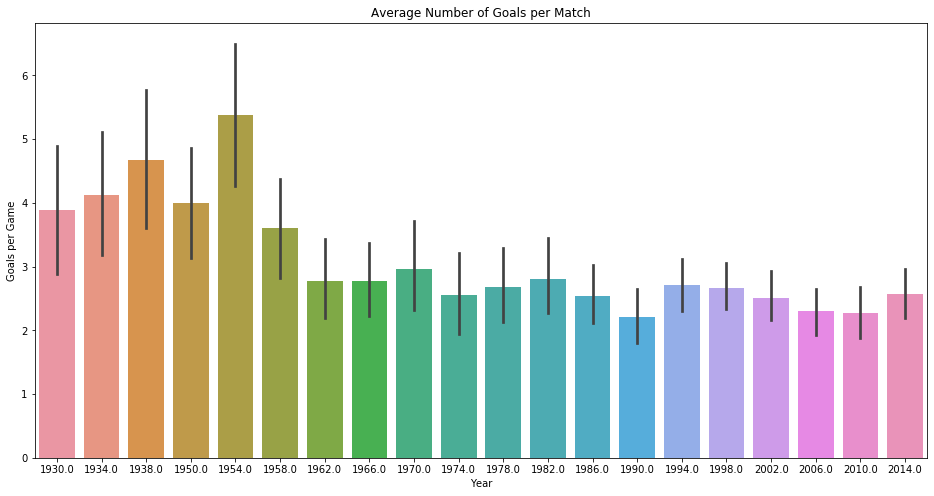

In [5]:
# Plotting the average number of goals per year in a bar plot

ax, f = plt.subplots(figsize=(16, 8))

ax = sns.barplot(data = df, x = 'Year', y = 'Goals per Game')

ax.set_title('Average Number of Goals per Match')

plt.show()

The above bar graphs give a decent idea of the average number of goals scored during game, but doesn't touch upon the distribution of the goals. To get an idea of the composition of these figures, we can plot a violin graph for the different years, showing how spread out the number of goals per game were.

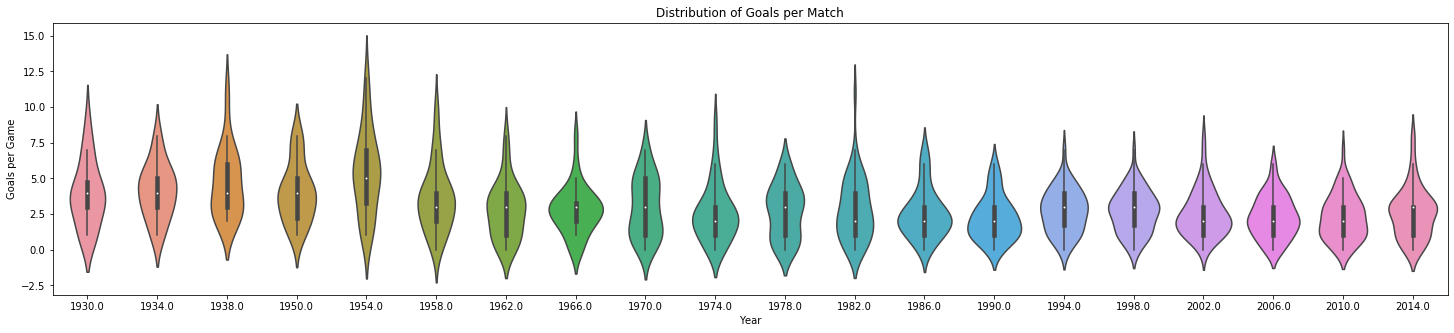

In [6]:
plt.figure(figsize = (25, 5))

ax2 = sns.violinplot(data = df, x = 'Year', y = 'Goals per Game')
ax2.set_title('Distribution of Goals per Match')
plt.show()

Next my focus will be on the team of the Netherlands. First, let's check the distribution of goals across the years were the Netherlands have participated (1934, 1938, 1974, 1978, 1990, 1994, 1998, 2006, 2010, 2014).

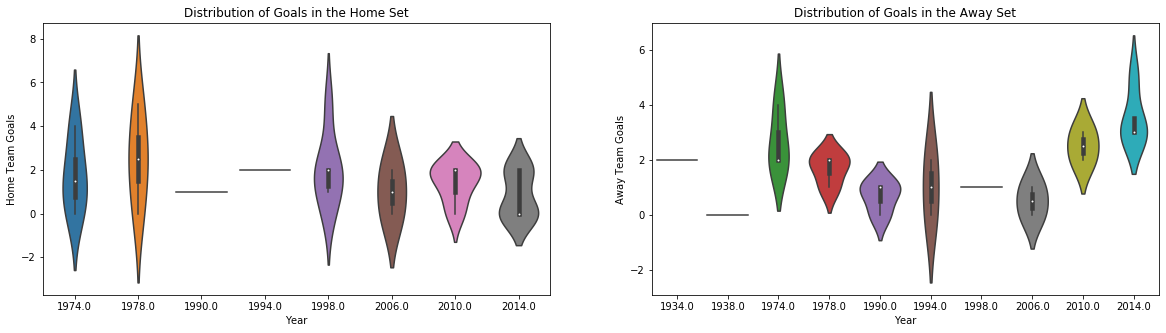

In [8]:
# First we slice off those parts of the main dataframe and create two new data frames based on 'home' and 'away' columns.

netherlands_home = df[df['Home Team Name'] == 'Netherlands']
netherlands_away = df[df['Away Team Name'] == 'Netherlands']

# These are just a subsection of the larger dataframe; however, 'Home/Away Goals' correspond to their respective 'Team Name'

plt.figure(figsize=(20, 5))

ax3 = plt.subplot(1,2,1)
sns.violinplot(data = netherlands_home, x = 'Year', y = 'Home Team Goals')

ax3.set_title('Distribution of Goals in the Home Set')

plt.subplot(1,2,2)
ax4 = sns.violinplot(data = netherlands_away, x = 'Year', y = 'Away Team Goals')

ax4.set_title('Distribution of Goals in the Away Set')

plt.show()

The division between home and away doesn't serve any statistical value for the games considered here. Instead, this is a reflection of score notations in HOME-AWAY format. As such, it would serve a better purpose to combine the two figures together and plot these in a new graph.

In order to get a full figure we would need to collate the 'Home Team Goals' with the 'Away Team Goals' into a combined column of 'Goals'. To achieve this, we can create two new dataframes that share the same names, e.g. 'Year' and 'Goals', and concatenate the two. Grouping by year isn't necessary as we plot the years as an x-value and have Seaborn calculate the distribution.

       Year  Goals
244  1974.0    0.0
258  1974.0    4.0
265  1974.0    2.0
269  1974.0    1.0
277  1978.0    3.0


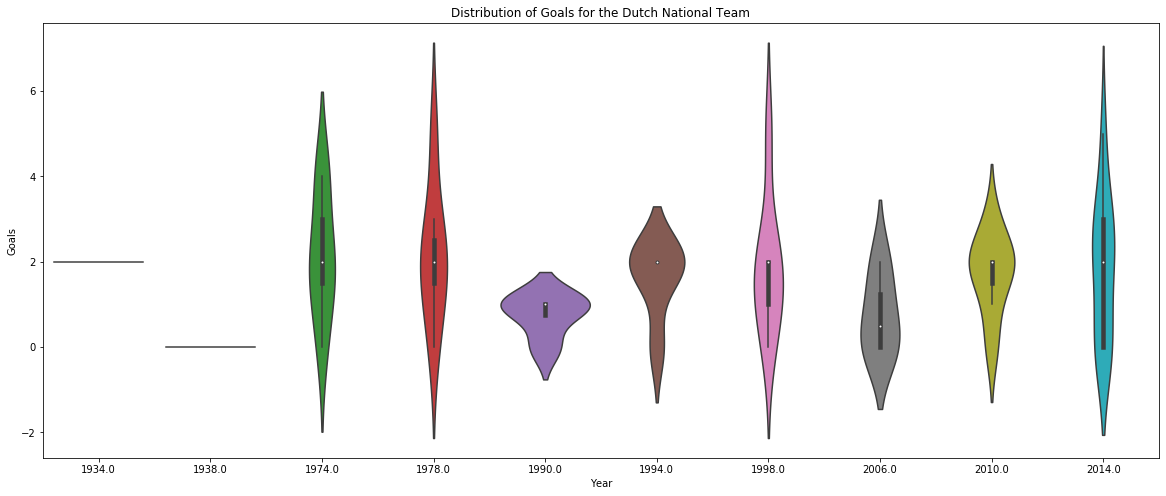

In [10]:
# Create new dataframe containing just the 'Year' and 'Home Team Goals', with the latter column renamed to 'Goals':

home_goals = netherlands_home[['Year', 'Home Team Goals']]
home_goals.columns = ['Year', 'Goals']

# Create new dataframe containing just the 'Year' and 'Away Team Goals', with the latter column renamed to 'Goals':
away_goals = netherlands_away[['Year', 'Away Team Goals']]
away_goals.columns = ['Year', 'Goals']

# Since the two new dataframes share the same columns, we can concatenate these into a single dataframe (see output below):
all_goals = pd.concat([home_goals, away_goals])
print(all_goals.head())

# Plotting this into a violin plot:
plt.figure(figsize=(20, 8))

ax5 = sns.violinplot(data = all_goals, x = 'Year', y = 'Goals')
ax5.set_title('Distribution of Goals for the Dutch National Team')

plt.show()

Note that violin plots are based on Q1, median, and Q3. Hence, when there's no median to be found, the figure won't display. This is the case for the first two matches, where only a single game was played, and as such only a single figure 'Goals per Game' value is provided (2 goals in 1934 against Switzerland, 0 goals in 1938 against Czechoslovakia). 

Ignoring the dips below 0 (note that violin plots use a 95% confidence interval; anything outside the black central line is probably best ignored here), the above figure gives a solid representation of the distribution of goals by the national team. 

Looking back at the average goals of the team, a bar graph may shed some more light on the averages of the World Cups in which the team participated.

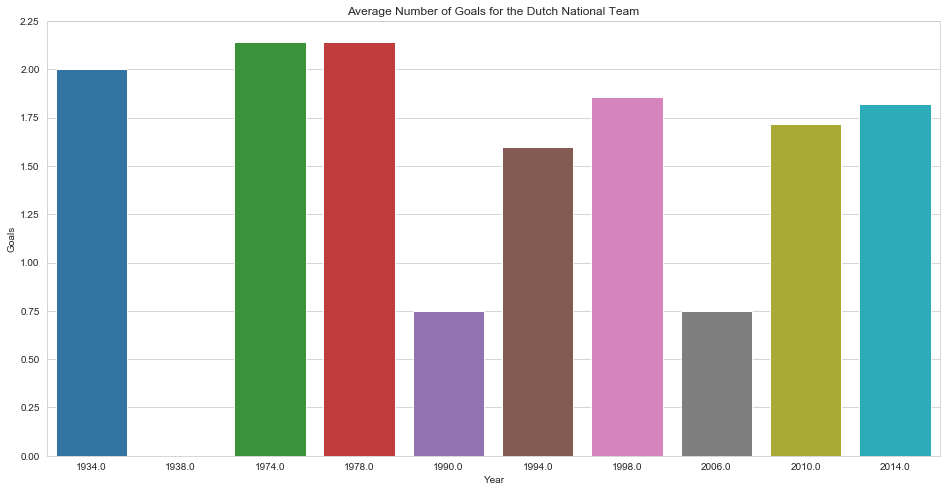

In [11]:
plt.figure(figsize=(16, 8))

sns.set_style('whitegrid')

ax6 = sns.barplot(data = all_goals, x = 'Year', y = 'Goals', ci=0,)
ax6.set_title('Average Number of Goals for the Dutch National Team')

plt.show()

Combined, the violin plots and bar graphs give a solid idea of the average goals per game, as well as the distribition of the goals in these games.

Finally, we may want to calculate the total number of goals per championship, and plot these as a simple line plot:

   Year  Total Goals
0  1934          2.0
1  1938          0.0
2  1974         15.0
3  1978         15.0
4  1990          3.0
5  1994          8.0
6  1998         13.0
7  2006          3.0
8  2010         12.0
9  2014         20.0


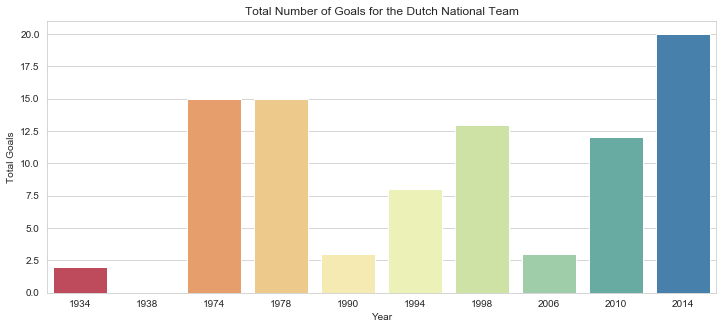

In [12]:
# First we create a new dataframe which sums up the total amount of goals for each year:

sum_of_goals = pd.DataFrame([
    [1934, 2],
    [1938, 0],
    [1974, np.sum(all_goals['Goals'][all_goals['Year'] == 1974])],
    [1978, np.sum(all_goals['Goals'][all_goals['Year'] == 1978])],
    [1990, np.sum(all_goals['Goals'][all_goals['Year'] == 1990])],
    [1994, np.sum(all_goals['Goals'][all_goals['Year'] == 1994])],
    [1998, np.sum(all_goals['Goals'][all_goals['Year'] == 1998])],
    [2006, np.sum(all_goals['Goals'][all_goals['Year'] == 2006])],
    [2010, np.sum(all_goals['Goals'][all_goals['Year'] == 2010])],
    [2014, np.sum(all_goals['Goals'][all_goals['Year'] == 2014])]
],
columns=['Year', 'Total Goals'])

print(sum_of_goals)

# and plot this in a graph:

plt.figure(figsize = (12, 5))

ax7 = sns.barplot(data = sum_of_goals, x = 'Year', y = 'Total Goals', palette = 'Spectral' )
ax7.set_title('Total Number of Goals for the Dutch National Team')


plt.show()

Since we now have a full overview of all goals made by the Dutch team during the World Cups, we can put these in a pie chart to check the distribution of said goals. Since Seaborn doesn't support pie charts, we revert to Matplotlib to plot our chart.

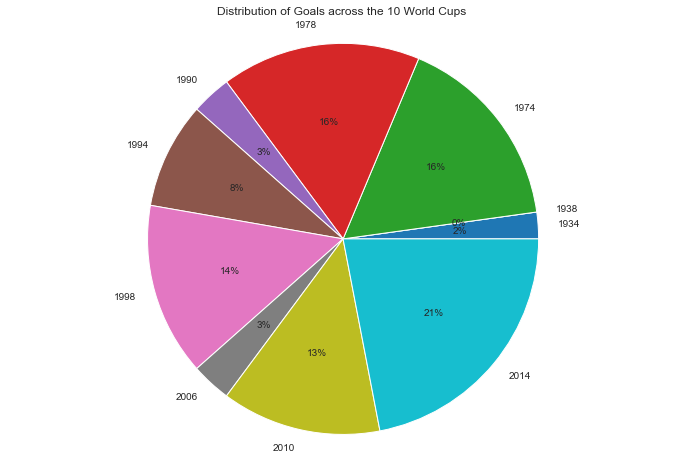

In [13]:
plt.figure(figsize = (12, 8))

plt.pie(sum_of_goals['Total Goals'], labels = sum_of_goals['Year'], autopct = '%d%%')
plt.axis('equal')

plt.title('Distribution of Goals across the 10 World Cups')

plt.show()

This is it so far. Feedback is more than welcome.